<a href="https://colab.research.google.com/github/Igben-Nehemiah/ML-practice/blob/main/ML_for_Process_Systems_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the Scripting Environment

In [2]:
import numpy as np

In [3]:
arr = np.array([[1, 4, 6], [2, 5, 7]])

print(arr.size) # 6
print(arr.ndim) # 2
print(arr.shape) # (2, 3)

6
2
(2, 3)


In [4]:
arr1 = np.array([[1, 4, 6], [2, 5, 7]])

arr2 = np.array([[2], [4]])

arr1 + arr2

array([[ 3,  6,  8],
       [ 6,  9, 11]])

In [5]:
import pandas as pd


In [6]:
data = np.arange(6).reshape(3, 2)

df = pd.DataFrame(data=data, columns=["id", "value"])
df

,id,value
0,0,1
1,2,3
2,4,5


In [7]:
df.groupby('id').mean()

,value
id,
0,1.0
2,3.0
4,5.0


In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [9]:
data = np.array([
    [-5, 19],
    [-4.4, 18],
    [-4.35, 17.8],
    [-4.1, 16],
    [-4.05, 12.2],
    [-4, 12]
])

x = data[:, 0:1]
y = data[:, 1:]

In [10]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(x)

X_poly

array([[-5.    , 25.    ],
       [-4.4   , 19.36  ],
       [-4.35  , 18.9225],
       [-4.1   , 16.81  ],
       [-4.05  , 16.4025],
       [-4.    , 16.    ]])

In [11]:
scaler = StandardScaler()
scaler.fit_transform(X_poly)

array([[-2.01019039,  2.04058499],
       [-0.24514517,  0.19940658],
       [-0.09805807,  0.05658468],
       [ 0.63737744, -0.6330411 ],
       [ 0.78446454, -0.7660695 ],
       [ 0.93155164, -0.89746565]])

In [12]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [13]:
y_predicted = model.predict(X_poly)

In [14]:
y_predicted

array([[18.94554751],
       [18.38101741],
       [17.86874711],
       [14.23379687],
       [13.29208707],
       [12.27880403]])

In [15]:
print('Fit accuracy=', r2_score(y, y_predicted))

Fit accuracy= 0.9023349965626839


Text(0, 0.5, 'y')

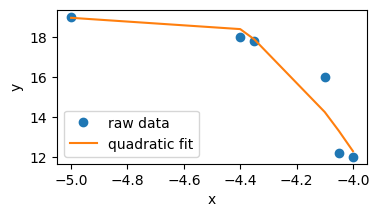

In [16]:
plt.figure(figsize=(4,2))
plt.plot(x, y, 'o', label='raw data')
plt.plot(x, y_predicted, label='quadratic fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

# Machine Learning Model Development: Workflow and Best Practices


**Data Pre-processing: Data Transformation**

In [17]:
X = np.array([
    [1000, 0.01, 300],
    [1200, 0.06, 350],
    [1500, 0.1, 320]
])

scaler = StandardScaler().fit(X)

In [18]:
scaler

StandardScaler()

In [19]:
X_scaled = scaler.transform(X)

In [20]:
X_scaled

array([[-1.13554995, -1.26750044, -1.13554995],
       [-0.16222142,  0.09053575,  1.29777137],
       [ 1.29777137,  1.1769647 , -0.16222142]])

### One-hot encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
x = np.array([
    ['type A'],
    ['type C'],
    ['type B'],
    ['type C']
])

ohe = OneHotEncoder(sparse_output=False) # sparse_output = False returns array
X_encoded = ohe.fit_transform(x)

### Workflow automation via pipelines

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np


In [24]:
data = np.array([
    [-5, 19],
    [-4.4, 18],
    [-4.35, 17.8],
    [-4.1, 16],
    [-4.05, 12.2],
    [-4, 12]
])

x = data[:, 0:1]
y = data[:, 1:]

pipe = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('model', LinearRegression())])

pipe.fit(x, y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [25]:
pipe.predict(x)

array([[18.94554751],
       [18.38101741],
       [17.86874711],
       [14.23379687],
       [13.29208707],
       [12.27880403]])

### Model Evaluation

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = np.array([
    [-5, 19],
    [-4.4, 18],
    [-4.35, 17.8],
    [-4.1, 16],
    [-4.05, 12.2],
    [-4, 12]
])

x = data[:, 0:1]
y = data[:, 1:]

In [27]:
# R2 metrics

model = LinearRegression()
model.fit(x, y)
model.predict(x)

array([[20.32427885],
       [16.38100962],
       [16.05240385],
       [14.409375  ],
       [14.08076923],
       [13.75216346]])

In [28]:
model.score(x, y)

0.6438355834004028

In [29]:
# Classification metrics
# Holdout method / Cross-validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


# Data Pre-processing: Cleaning Process Data

### Signal de-noising

#### Simple Moving Average (SMA)

In [30]:
noisy_signal = np.loadtxt('noisy_flow_signal.csv', delimiter=',')

In [32]:
windowSize = 15
smoothed_signal_MA = pd.DataFrame(noisy_signal).rolling(windowSize).mean().values # taking mean on a rolling window and converting back to numpy array


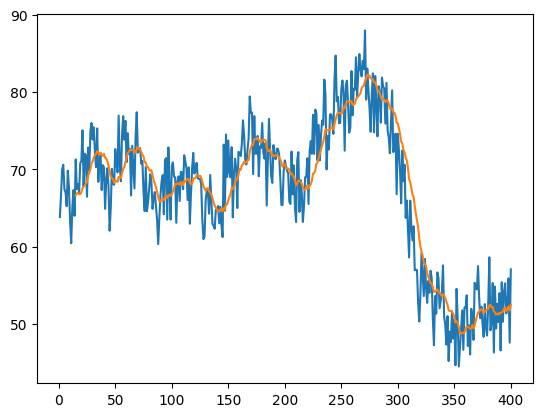

In [35]:
x_values = np.arange(1, noisy_signal.size + 1)

plt.plot(x_values, noisy_signal)
plt.plot(x_values, smoothed_signal_MA)